In [2]:
#假设1：影响房价的关键因素是卧室个数，卫生间个数和居住面积，记为x1,x2,x3
#假设2：成交价是关键因素的加权和
         #y=w1x2+w2x2+w3x3+b

In [3]:
#线性模型(可以看成单层神经网络)
# n维输入 [x1,x2,...,xn]^T
# n维权重 [w1,w2,...,wn]^T,标量偏差b
# 输出 y=w1x2+w2x2+..+wnxn+b
# 向量版本 y=<w,x>+b

In [4]:
#定义损失函数（衡量预估质量）
 #假设y是真实值，y^是估计值
     #l(y,y^)=(1/2)*(y-y^)^2
     #平方损失，1/2是为了求导方便消去

In [5]:
#训练数据
  #假设有n个样本，记为：
  #X=[x1,x2,...,xn]^T (xi表示一个行向量),y=[y1,y2,...yn]^T

In [ ]:
#参数学习
 #训练损失 l(X,y,w,b)=(1/(2*n))(i:1->n)(yi-<xi,w>-b)^2
 #最小化损失来学习参数
  #w*,b*=arg minl(X,y,w,b)


#线性回归存在显示解
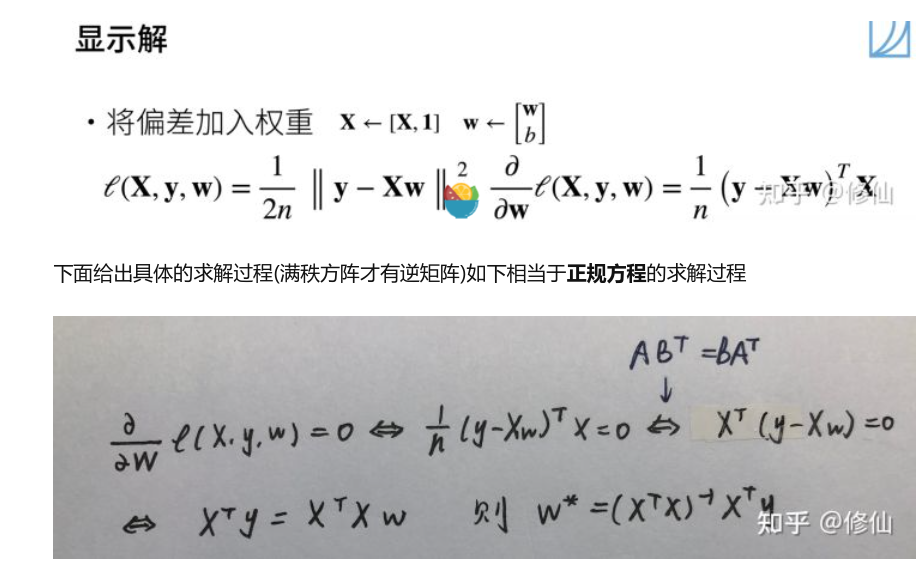

#基础优化算法（针对模型没有显示解的情况）
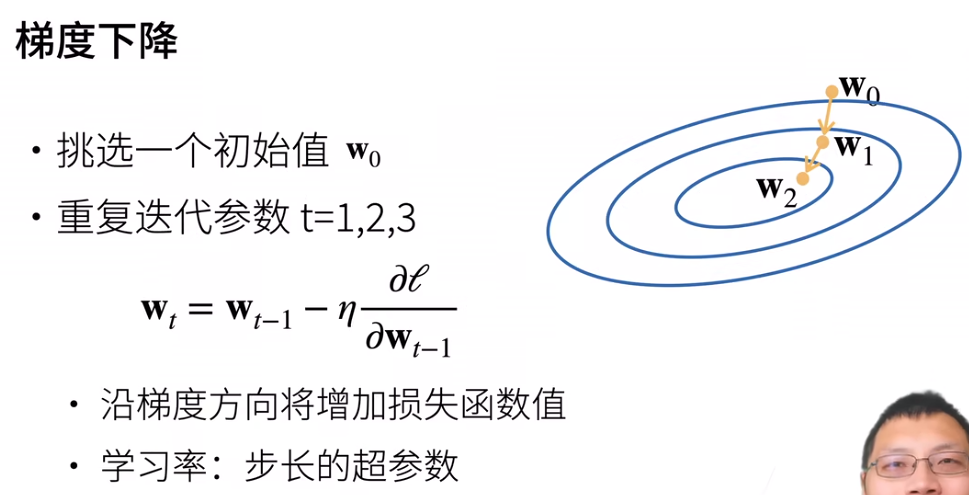
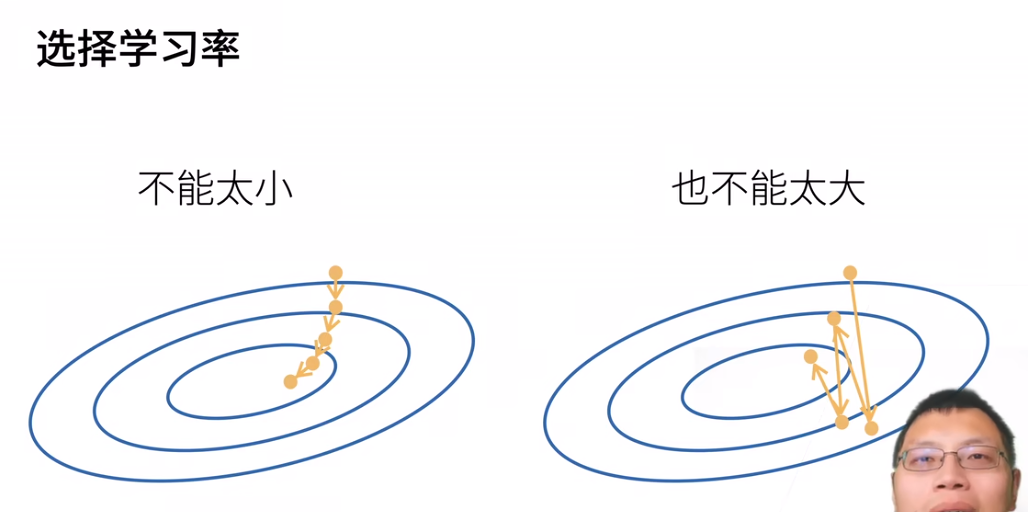
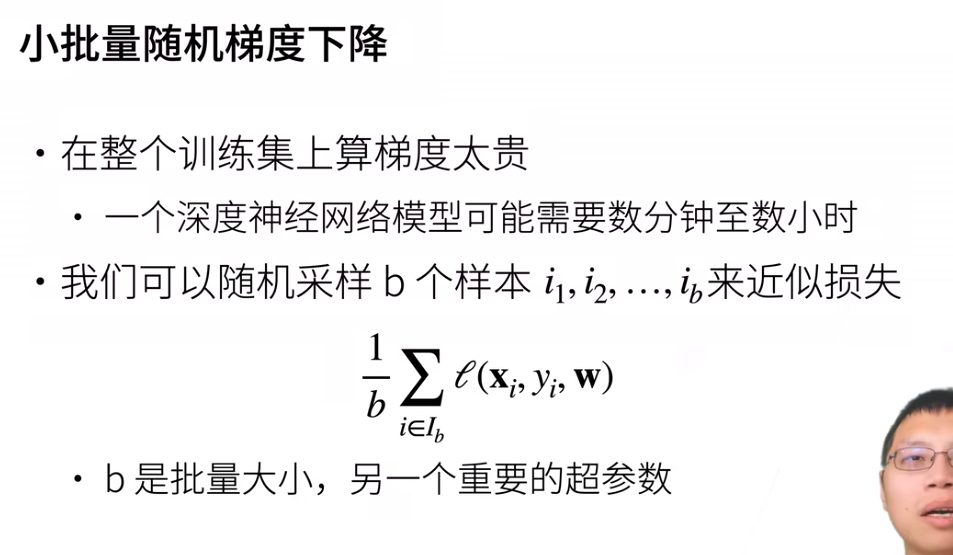
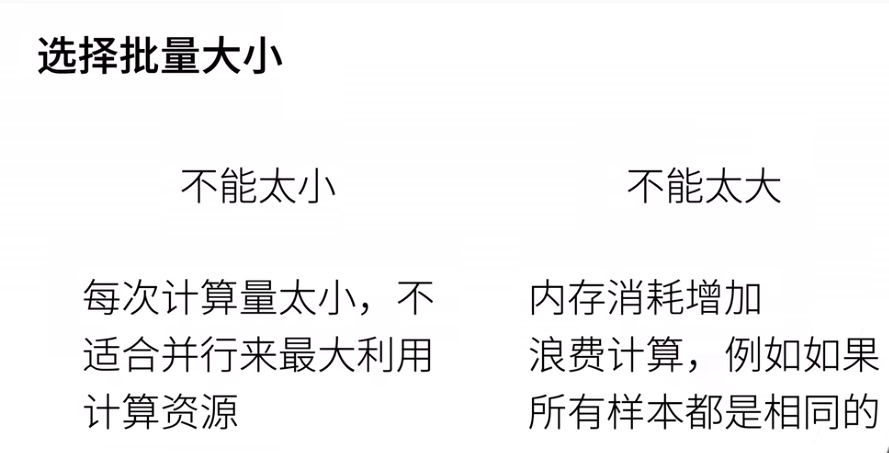

In [7]:
#梯度下降通过不断沿着反梯度方向更新参数求解
#小批量随机梯度下降是深度学习默认的求解算法
#两个重要的超参数是批量大小和学习率

In [8]:
#线性模型从0开始实现（包括数据流水线、模型、损失函数和小批量随机梯度下降优化器）
import torch
import random

# 构造数据集
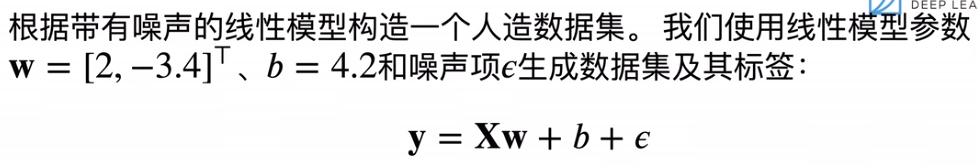

In [55]:
def synthetic_data(w,b,num_examples):
    #生成 y=Xw+b+噪声
    X = torch.normal(0,1,(num_examples,len(w))) #生成均值为0，方差为1，大小为（num_examples,len(x))的张量
    y = torch.mv(X,w) + b
    y += torch.normal(0,1,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = torch.tensor([4.2])
print(true_w.shape)
features, labels = synthetic_data(true_w,true_b,1000)
features.shape, labels.shape

torch.Size([2])


(torch.Size([1000, 2]), torch.Size([1000, 1]))

(<module 'matplotlib.pyplot' from '/home/ljz/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.collections.PathCollection at 0x7fa43ad98be0>)

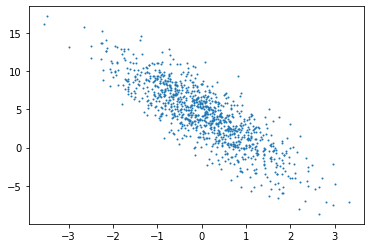

In [56]:
#画出数据分布的图像
import matplotlib.pyplot as plt  
plt,plt.scatter(features[:,1].detach().numpy(),labels.detach(),1) #scatter表示画散点图

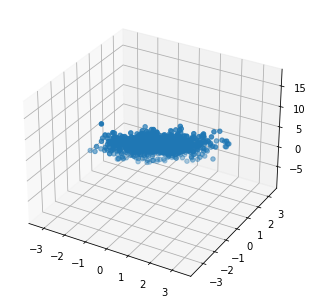

In [57]:
#画3D图
from mpl_toolkits.mplot3d import Axes3D
x = features[:,0].numpy()
y = features[:,1].numpy()
z = labels.numpy()
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)

In [58]:
#定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入、生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) #打乱顺序
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
       #yield就是 return 返回一个值，并且记住这个返回的位置，下次迭代就从这个位置后开始，相当于一个迭代器，下一次迭代从yield语句下一句开始
for i,j in data_iter(10,features, labels):
    print(i,'\n',j)
    break

tensor([[ 1.3152,  0.3713],
        [-0.5853,  0.2827],
        [-0.2909,  0.2779],
        [-0.4703, -1.5062],
        [ 0.3689,  0.3914],
        [ 0.1804,  0.2315],
        [-1.6012, -0.1255],
        [ 1.1623, -0.5462],
        [-0.0926, -0.1461],
        [ 0.1504,  0.7590]]) 
 tensor([[4.8937],
        [2.7005],
        [2.5520],
        [6.5412],
        [3.3671],
        [3.1473],
        [2.2661],
        [7.5565],
        [4.2203],
        [2.5471]])


In [69]:
 #定义初始化模型参数
w = torch.normal(0,1,(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
#定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [73]:
#定义损失函数（均方误差）
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [74]:
#定义优化函数
def sgd(params,lr,batch_size):#params表示要进行梯度下降优化的参数列表
    with torch.no_grad(): #此时不需要梯度回传
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [76]:
#训练过程
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features, labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l =loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean().item())}')

epoch 1, loss 0.5019683837890625
epoch 2, loss 0.5015392899513245
epoch 3, loss 0.5011659264564514


In [77]:
#比较真实参数和通过训练学到的参数来评估训练的成功程度
print(f'w的估计误差 {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差 {true_b - b}')

w的估计误差 tensor([-0.0573,  0.0185], grad_fn=<SubBackward0>)
b的估计误差 tensor([-0.0421], grad_fn=<SubBackward0>)


In [78]:
#线性回归的简洁实现
   #通过使用深度学习框架来简写地实现线性回归模型 生成数据集

In [90]:
#调用框架现有的API来读取数据
import torch.utils.data as data
batch_size = 10
# 将训练数据的特征和标签包装成数据集
dataset = data.TensorDataset(features,labels)
data_iter = data.DataLoader(dataset,batch_size,shuffle=True)
for x,y in data_iter:
    print(x,'\n',y)
    break
next(iter(data_iter)) #iter用来生成迭代器

tensor([[ 0.5648, -1.0135],
        [ 1.0768,  0.2911],
        [ 2.1249,  0.7916],
        [ 0.8479,  0.0664],
        [ 0.5494,  0.0986],
        [ 0.7816,  0.3274],
        [ 0.3668,  1.8920],
        [ 0.1559, -0.9469],
        [-0.8167,  1.6538],
        [-0.0664, -0.2697]]) 
 tensor([[ 8.9514],
        [ 5.8985],
        [ 5.5303],
        [ 5.9094],
        [ 3.9820],
        [ 5.9291],
        [-0.5061],
        [ 8.4953],
        [-4.7602],
        [ 5.2440]])


[tensor([[ 0.4721, -1.2552],
         [ 0.7608,  0.6990],
         [-0.0405, -0.0986],
         [ 0.1968, -0.4608],
         [-0.9724, -0.8188],
         [ 0.9863,  0.4083],
         [-0.4453, -1.9551],
         [ 2.8804,  0.8673],
         [-0.4634, -0.7486],
         [-1.0239,  0.3562]]),
 tensor([[10.5075],
         [ 2.8400],
         [ 5.4420],
         [ 6.3503],
         [ 5.5454],
         [ 4.1028],
         [ 9.8677],
         [ 6.6802],
         [ 6.5580],
         [ 0.8530]])]

In [94]:
#使用框架中定义的层
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

In [97]:
#初始化模型参数
print(net[0])
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

Linear(in_features=2, out_features=1, bias=True)


tensor([0.])

In [112]:
# 使用定义好的均方误差
loss = nn.MSELoss()
#实例化SGD实例
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

In [113]:
#训练过程
num_epochs = 3
for epoch in range(num_epochs):
    for x,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch {epoch+1}, loss {l.item()}')

epoch 1, loss 16.54814910888672
epoch 2, loss 16.198333740234375
epoch 3, loss 17.164411544799805


 有时候我们不想让学习率固定成⼀个常数，调整学习率主要有两种做法。
⼀种是修改 optimizer.param_groups 中对应的学习率；
另⼀种是更简单也是较为推荐的做法——新建优化器，由于optimizer⼗分轻量级，构建开销很⼩，故⽽可以构建新的optimizer。
但是后者对于使⽤动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的收敛出现震荡等情况。
调整学习率
```python
    parm_groups表示参数集合（可能有多个优化器参数）
    for param_group in optimizer.param_groups:
       param_group['lr'] *= 0.1 (学习率为之前的0.1倍
```